In [1]:
pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

 98% 698M/715M [00:05<00:00, 172MB/s]
100% 715M/715M [00:05<00:00, 127MB/s]


In [4]:
from zipfile import ZipFile
file_name = "/content/cifar-10.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [5]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [6]:
!pip install py7zr
import py7zr

archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.6/413.6 kB 24.5 MB/s eta 0:00:00


In [7]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [8]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
filenames = os.listdir('/content/train')

In [10]:
type(filenames)

list

In [11]:
len(filenames)

50000

In [12]:
print(filenames[0:5])
print(filenames[-5:])

['43547.png', '24401.png', '12112.png', '32670.png', '35120.png']
['18551.png', '44278.png', '26836.png', '8058.png', '36430.png']


**Labels Processing**

In [13]:
df = pd.read_csv('/content/trainLabels.csv')

In [14]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [15]:
df.shape

(50000, 2)

In [16]:
df[df['id'] == 11119]

,id,label
11118,11119,deer


In [17]:
df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [18]:
df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [19]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in df['label']]

In [20]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [21]:
!pip install opencv-python


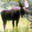

In [22]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/4562.png')
cv2_imshow(img)

In [23]:
df[df['id'] == 4562]

,id,label
4561,4562,deer


**Image Processing**

In [24]:
id_list = list(df['id'])

In [25]:
train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [26]:
print(data[0].shape)

(32, 32, 3)


In [27]:
x = np.array(data)
y = np.array(labels)

In [28]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .2, random_state=2)

In [30]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]], dtype=uint8)
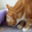

In [31]:
xtrain[0]

In [32]:
!pip install tensorflow

In [33]:
import tensorflow as tf
from tensorflow import keras

**ResNet50**

In [34]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [35]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [36]:
no_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation = 'softmax'))

In [37]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [38]:
history = model.fit(xtrain_scaled, ytrain, epochs = 10, validation_split = 0.1)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 488s 381ms/step - accuracy: 0.3351 - loss: 2.0223 - val_accuracy: 0.7113 - val_loss: 1.0023
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 477s 388ms/step - accuracy: 0.6701 - loss: 1.0687 - val_accuracy: 0.8873 - val_loss: 0.4521
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 380ms/step - accuracy: 0.8023 - loss: 0.7468 - val_accuracy: 0.9205 - val_loss: 0.3281
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 381ms/step - accuracy: 0.8637 - loss: 0.5660 - val_accuracy: 0.9320 - val_loss: 0.2813
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 435s 386ms/step - accuracy: 0.9046 - loss: 0.4420 - val_accuracy: 0.9330 - val_loss: 0.2587
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 436s 388ms/step - accuracy: 0.9295 - loss: 0.3547 - val_accuracy: 0.9373 - val_loss: 0.2353
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 434s 380ms/step - accuracy: 0.9468 - loss: 0.2917 - val_accuracy: 0.9315 - val_loss: 0.2466
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 380ms/step - ac

In [43]:
loss ,accuracy = model.evaluate(xtest_scaled, ytest)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.9365 - loss: 0.2441
0.9384999871253967


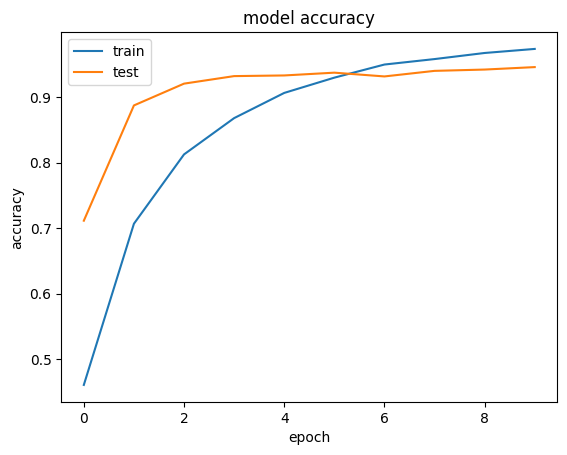

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

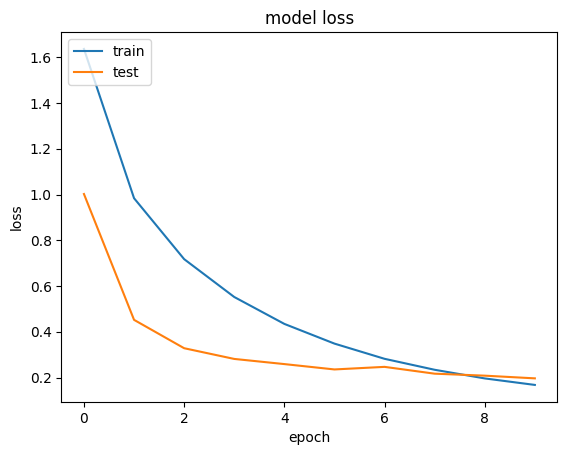

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the trained model
model.save("cifar10_resnet50.h5")
print("Model saved as cifar10_resnet50.h5")


Model saved as cifar10_resnet50.h5


In [45]:
from google.colab import files
files.download("cifar10_resnet50.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
def test():
    try:
        image_path = input("Enter the path of the image: ")
        img = Image.open(image_path).convert("RGB").resize((32,32))
        img_array = np.array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_array)
        pred_class = np.argmax(pred)

        labels_dictionary = {
            0:'airplane', 1:'automobile', 2:'bird', 3:'cat',
            4:'deer', 5:'dog', 6:'frog', 7:'horse',
            8:'ship', 9:'truck'
        }

        print("Predicted class:", labels_dictionary[pred_class])
    except Exception as e:
        print("Error:", e)

# Run the function
test()


Enter the path of the image: /content/images.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: horse
